In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import pandas as pd
from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd drive/MyDrive/

[Errno 2] No such file or directory: 'drive/MyDrive/'
/content/drive/MyDrive


In [73]:
df=pd.read_csv("Final.csv")
df1=pd.read_csv("Final.csv")

In [145]:
df.head()

,Unnamed: 0,State,District,Population,Children_Between_1_to_2_years,Total_Arthritis_Patient,Arthritis_Patient_Male,Arthritis_Patient_Female,Children_Vaccinated,Children_Immunized,Children_Vaccinated_at_Birth,Children_Not_Vaccinated,Total_Children_Weighted,Children_Weighted_less_than_2.5_Kg,Women_Aged_15_49_years,Sum
0,0,Assam,0,64606,2371,1072.0,832.0,1328.0,76.5,62.1,67.7,4.3,55.3,22.5,12208.5,0.0
1,1,Assam,1,84012,2451,929.0,701.0,1171.0,67.8,52.4,73.7,3.4,55.7,21.6,16157.0,1.0
2,2,Assam,2,127158,5709,2964.0,2448.0,3474.0,71.3,64.5,82.0,2.7,61.7,27.8,22614.5,1.0
3,3,Assam,3,29048,984,1557.0,1360.0,1766.0,79.3,56.4,76.3,5.3,65.0,25.2,5225.5,0.0
4,4,Assam,4,75451,3467,1109.0,958.0,1265.0,80.4,66.6,78.5,7.5,74.1,14.5,13844.0,1.0


In [74]:
#sorting districts in accordance to total arthritis patient
df1.sort_values(["Total_Arthritis_Patient"], 
                    axis=0,
                    ascending=[False], 
                    inplace=True)

In [140]:
#taking top 20 dist. with arthritis patient
popArt = df1.iloc[:19, :]

In [143]:
popArt.head()

,Unnamed: 0,State,District,Population,Total_Arthritis_Patient,Arthritis_Patient_Male,Arthritis_Patient_Female,Children_Vaccinated,Children_Immunized,Children_Vaccinated_at_Birth,Children_Not_Vaccinated,Total_Children_Weighted,Children_Weighted_less_than_2.5_Kg,Women_Aged_15_49_years
10,10,Assam,Jorhat,172958,7910.00,7203.00,8633.00,81.00,70.90,84.90,1.30,81.00,22.50,33790.5
8,8,Assam,Golaghat,72165,7202.00,6482.00,7945.00,76.90,69.40,80.50,1.40,75.50,24.70,13803.5
279,279,Uttarakhand,Pithoragarh,102999,5884.42,3469.81,8116.12,94.88,88.74,70.43,1.28,55.39,30.58,20711.5
239,239,Uttar Pradesh,Kannauj,156432,5631.64,4161.75,7212.32,59.10,46.44,64.07,2.95,40.99,21.89,25418.0
20,20,Assam,Sibsagar,57972,5621.00,4907.00,6369.00,88.40,83.50,92.40,0.80,86.30,23.50,10944.5


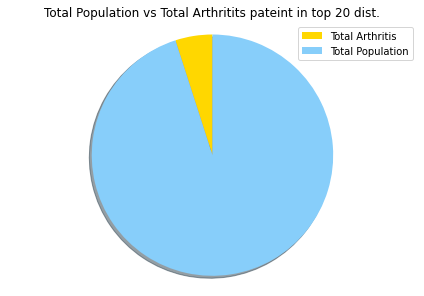

In [144]:
import matplotlib.pyplot as plt

TotalPop = popArt['Population'].sum()
TotalArt = popArt['Total_Arthritis_Patient'].sum()
sizes = [((TotalArt/(TotalPop+TotalArt))*100), ((TotalPop/(TotalPop+TotalArt))*100)]
labels = ['Total Arthritis', 'Total Population']
colors = ['gold', 'lightskyblue']

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Total Population vs Total Arthritits pateint in top 20 dist.')
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Population vs Arthritits pateint in top 20 dist.')

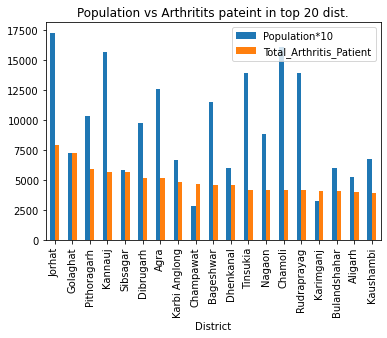

In [126]:
popArt['Population*10'] = popArt['Population']/10

popArt.plot(x="District", y=["Population*10", "Total_Arthritis_Patient",], kind='bar')
plt.title('Population vs Arthritits pateint in top 20 dist.')


Text(0.5, 1.0, 'Women aged 15-49 yrs vs Arthritits pateint in top 20 dist.')

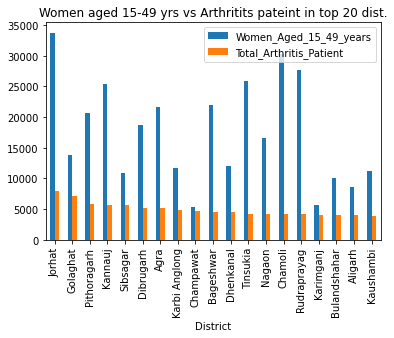

In [131]:
popArt.plot(x="District", y=["Women_Aged_15_49_years", "Total_Arthritis_Patient",], kind='bar')
plt.title('Women aged 15-49 yrs vs Arthritits pateint in top 20 dist.')


In [132]:
district=df['District'].unique()

In [133]:
import numpy as np
np.array(district)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [134]:
#district.sort()
print(len(district))

284


In [135]:
dist={}
for i in range(len(district)):
    dist[district[i]]=i
df['District']=df.District.astype(object)
df['District'].replace(dist,inplace=True)
print(df['District'])

0        0
1        1
2        2
3        3
4        4
      ... 
279    279
280    280
281    281
282    282
283    283
Name: District, Length: 284, dtype: int64


In [136]:
df.head()

,Unnamed: 0,State,District,Population,Children_Between_1_to_2_years,Total_Arthritis_Patient,Arthritis_Patient_Male,Arthritis_Patient_Female,Children_Vaccinated,Children_Immunized,Children_Vaccinated_at_Birth,Children_Not_Vaccinated,Total_Children_Weighted,Children_Weighted_less_than_2.5_Kg,Women_Aged_15_49_years
0,0,Assam,0,64606,2371,1072.0,832.0,1328.0,76.5,62.1,67.7,4.3,55.3,22.5,12208.5
1,1,Assam,1,84012,2451,929.0,701.0,1171.0,67.8,52.4,73.7,3.4,55.7,21.6,16157.0
2,2,Assam,2,127158,5709,2964.0,2448.0,3474.0,71.3,64.5,82.0,2.7,61.7,27.8,22614.5
3,3,Assam,3,29048,984,1557.0,1360.0,1766.0,79.3,56.4,76.3,5.3,65.0,25.2,5225.5
4,4,Assam,4,75451,3467,1109.0,958.0,1265.0,80.4,66.6,78.5,7.5,74.1,14.5,13844.0


In [137]:
df['Sum']=df['Total_Arthritis_Patient']+df['Children_Not_Vaccinated']*1000+df['Women_Aged_15_49_years']

In [138]:
np.mean(df['Sum'])

19854.591109154946

In [139]:
for i in range(len(df['Sum'])):
    if df['Sum'][i]>19854.591109154946:
        df['Sum'][i]=1
    else:
        df['Sum'][i]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df['Sum']

0      0.0
1      1.0
2      1.0
3      0.0
4      1.0
      ... 
279    1.0
280    1.0
281    1.0
282    1.0
283    1.0
Name: Sum, Length: 284, dtype: float64

In [ ]:
df.describe()

,Unnamed: 0,District,Population,Children_Between_1_to_2_years,Total_Arthritis_Patient,Arthritis_Patient_Male,Arthritis_Patient_Female,Children_Vaccinated,Children_Immunized,Children_Vaccinated_at_Birth,Children_Not_Vaccinated,Total_Children_Weighted,Children_Weighted_less_than_2.5_Kg,Women_Aged_15_49_years,Sum
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,141.500000,141.500000,74178.753521,2797.573944,1669.219894,1294.553521,2056.383275,76.127570,65.148415,77.996972,4.501549,56.796373,25.028556,13683.821919,0.422535
std,82.127949,82.127949,38613.108658,1466.468416,1262.853571,1015.984674,1573.960548,12.276199,14.546203,11.760262,4.243642,21.452351,8.894126,7189.642052,0.494835
min,0.000000,0.000000,13892.000000,623.000000,49.000000,29.000000,70.000000,32.090000,24.900000,32.500000,0.160000,10.130000,5.420000,2384.000000,0.000000
25%,70.750000,70.750000,49222.500000,1818.000000,757.385000,583.245000,958.767500,68.742500,54.805000,70.667500,1.900000,38.707500,18.962500,9033.500000,0.000000
50%,141.500000,141.500000,65206.500000,2499.500000,1328.555000,1003.845000,1630.220000,77.385000,66.125000,80.500000,3.240000,55.850000,23.605000,12139.250000,0.000000
75%,212.250000,212.250000,88998.500000,3434.250000,2264.247500,1710.250000,2762.960000,85.882500,76.800000,87.000000,5.742500,74.675000,30.325000,16172.500000,1.000000
max,283.000000,283.000000,303009.000000,11814.000000,7910.000000,7203.000000,8633.000000,96.550000,92.100000,96.940000,30.670000,95.470000,54.700000,55407.500000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          284 non-null    int64  
 1   State                               284 non-null    object 
 2   District                            284 non-null    int64  
 3   Population                          284 non-null    int64  
 4   Children_Between_1_to_2_years       284 non-null    int64  
 5   Total_Arthritis_Patient             284 non-null    float64
 6   Arthritis_Patient_Male              284 non-null    float64
 7   Arthritis_Patient_Female            284 non-null    float64
 8   Children_Vaccinated                 284 non-null    float64
 9   Children_Immunized                  284 non-null    float64
 10  Children_Vaccinated_at_Birth        284 non-null    float64
 11  Children_Not_Vaccinated             284 non-n

In [ ]:
df.drop(columns=['State','Population','Children_Between_1_to_2_years','Arthritis_Patient_Male','Arthritis_Patient_Female','Children_Vaccinated','Children_Immunized','Children_Vaccinated_at_Birth','Total_Children_Weighted','Children_Weighted_less_than_2.5_Kg'],inplace=True)

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
print(df.columns)

Index(['District', 'Total_Arthritis_Patient', 'Children_Not_Vaccinated',
       'Women_Aged_15_49_years', 'Sum'],
      dtype='object')


In [ ]:
df.head()

,District,Total_Arthritis_Patient,Children_Not_Vaccinated,Women_Aged_15_49_years,Sum
0,0,1072.0,4.3,12208.5,0.0
1,1,929.0,3.4,16157.0,1.0
2,2,2964.0,2.7,22614.5,1.0
3,3,1557.0,5.3,5225.5,0.0
4,4,1109.0,7.5,13844.0,1.0


In [ ]:
df.drop(columns=['District'],inplace=True)

In [ ]:
df.head()

,Total_Arthritis_Patient,Children_Not_Vaccinated,Women_Aged_15_49_years,Sum
0,1072.0,4.3,12208.5,0.0
1,929.0,3.4,16157.0,1.0
2,2964.0,2.7,22614.5,1.0
3,1557.0,5.3,5225.5,0.0
4,1109.0,7.5,13844.0,1.0


In [ ]:
X=df.drop(['Sum'],axis=1)
Y=df['Sum']

In [ ]:
print(X)
print(Y)

     Total_Arthritis_Patient  Children_Not_Vaccinated  Women_Aged_15_49_years
0                    1072.00                     4.30                 12208.5
1                     929.00                     3.40                 16157.0
2                    2964.00                     2.70                 22614.5
3                    1557.00                     5.30                  5225.5
4                    1109.00                     7.50                 13844.0
..                       ...                      ...                     ...
279                  5884.42                     1.28                 20711.5
280                  4110.77                     1.67                 27629.0
281                  1332.66                     5.73                 39272.5
282                  1612.24                     2.79                 15773.5
283                   851.41                     6.97                 14130.5

[284 rows x 3 columns]
0      0.0
1      1.0
2      1.0
3      

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(284, 3) (227, 3) (57, 3)


In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(X_train, Y_train)

[13:53:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[ 6.82698786e-02  2.55608559e-03  2.65350640e-02  9.85065699e-01
  1.91830397e-02  4.59340811e-02  1.00062311e+00 -6.73007965e-03
  6.13161922e-03  8.76968801e-02 -1.76989436e-02 -6.24442101e-03
  3.55160832e-02  9.79669809e-01  2.97022462e-02  6.75267577e-02
  9.97163892e-01 -6.24442101e-03  9.89378035e-01  9.69636559e-01
  9.85750377e-01 -9.94586945e-03 -1.06987953e-02 -1.09923482e-02
  1.01601219e+00  1.91788256e-01  1.04317516e-01 -2.02653408e-02
 -1.06421113e-02  1.78942680e-02  9.96409893e-01  9.85750377e-01
 -8.47792625e-03 -2.46299505e-02  1.93556637e-01  9.97835875e-01
  9.11122441e-01  8.36476326e-01  9.74222839e-01 -5.91719151e-03
  6.58340752e-02  1.38425648e-01 -2.04510093e-02  1.02072930e+00
  9.73368287e-01 -6.08825684e-03  2.20038295e-02 -1.76989436e-02
  1.19833171e-01 -3.12914848e-02  1.00226700e-02  9.92361784e-01
 -1.06987953e-02  9.10713375e-01  3.89542282e-02  1.12903416e-02
  1.01838398e+00  1.55161619e-02  6.11281693e-02 -1.60863996e-02
 -2.62624025e-03 -2.81273

In [ ]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9789517851344465
Mean Absolute Error :  0.04156711041139611


In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8642948242639169
Mean Absolute Error :  0.1080500488741356
